# Vertigo Games – Data Analyst Case  
### **Task 2: User Analysis**  

**Tools:** Big Query, Looker Studio 

Task 2 aims to analyze user behavior and uncover meaningful player segments or engagement trends using the provided gameplay and monetization dataset.

This analysis focuses on data-driven insights, supported by SQL queries, visualizations, and clear interpretations.

## Data Approach

### Data Window & Cohort Selection

All Analysis made in Big Query and Data Visualized with Python.

Used SQL queries are available in src/useranalysis as text files.

The full dataset contains users installed the game dating back to 2022, but the event data spans from 2024-02-15 to 2024-03-15.
To ensure accurate and meaningful retention and segmentation metrics, all analyses are limited to users whose install_date also falls within this same range.

This prevents mixing older, long-lived users with fresh cohorts and keeps all retention calculations (D1, D3, D7, D14) aligned with the available event data.
All findings therefore reflect the behavior of new users who installed the game between Feb 15, 2024 and Mar 15, 2024.

## First Look

I began by exploring the full dataset to understand its structure and calculate basic KPIs such as session duration, session counts, match counts, and revenue metrics. This helped me confirm data quality and choose the most meaningful segmentation approaches. After this initial analysis, I focused on first-day engagement and its impact on user retention.

### D0 Dataset Overview (Install Cohort: 2024-02-15 → 2024-03-15)

| Metric | Value |
|--------|--------|
| Average Session Duration | **1157.4 sec** (≈ 19.3 min) |
| Average Session Count | **1.41 sessions** |
| Average Match Starts | **4.33** |
| Average Victory Rate | **62.9%** |
| Average IAP Revenue per User | **$0.023** |
| Average Ad Revenue per User | **0.02** |
| Total Unique Users | **1,056,852** |


### All Dataset Overview (Install Cohort: 2024-02-15 → 2024-03-15)

| Metric                       | Value                       |
| ---------------------------- | --------------------------- |
| Average Session Duration     | **1431.1 sec** (≈ 23.9 min) |
| Average Session Count        | **1.59 sessions**           |
| Average Match Starts         | **4.21**                    |
| Average Victory Rate         | **65.36%**                  |
| Average IAP Revenue per User | **$0.07**                 |
| Average Ad Revenue per User  | **0.02**                 |
| Total Unique Users           | **1,200,207**               |




### Platform User Count Distribution (Install Cohort: 2024-02-15 → 2024-03-15)

| Platform | User Count |
|--------|--------|
| Android | **766.640** |
| Ios | **290.221** |


### Country User Count Distribution (Install Cohort: 2024-02-15 → 2024-03-15)


| Country / Group   | Users       |
| ----------------- | ----------- |
| **Other**         | **491,953** |
| **Brazil**        | **94,182**  |
| **Türkiye**       | **86,466**  |
| **Russia**        | **85,310**  |
| **India**         | **59,695**  |
| **Vietnam**       | **58,634**  |
| **United States** | **55,295**  |
| **Ukraine**       | **33,872**  |
| **Indonesia**     | **33,712**  |
| **Philippines**   | **29,654**  |
| **Kazakhstan**    | **28,079**  |


## D0 Playtime & Session Count Segmentation & Retention Analysis

Understanding how long users play on their first day (D0) is one of the strongest predictors of long-term retention. In this analysis, I segmented users based on their install-day total session duration, then measured retention at D1, D3, D7, D14, and D21.

Five D0 playtime groups were defined:

- 0–5 min
- 5–10 min
- 10–15 min
- 15–30 min
- 30+ min

For Session Count Four D0 session count groups were defined:

- 1 session
- 2 sessions
- 3-4 sessions
- 4+ sessions

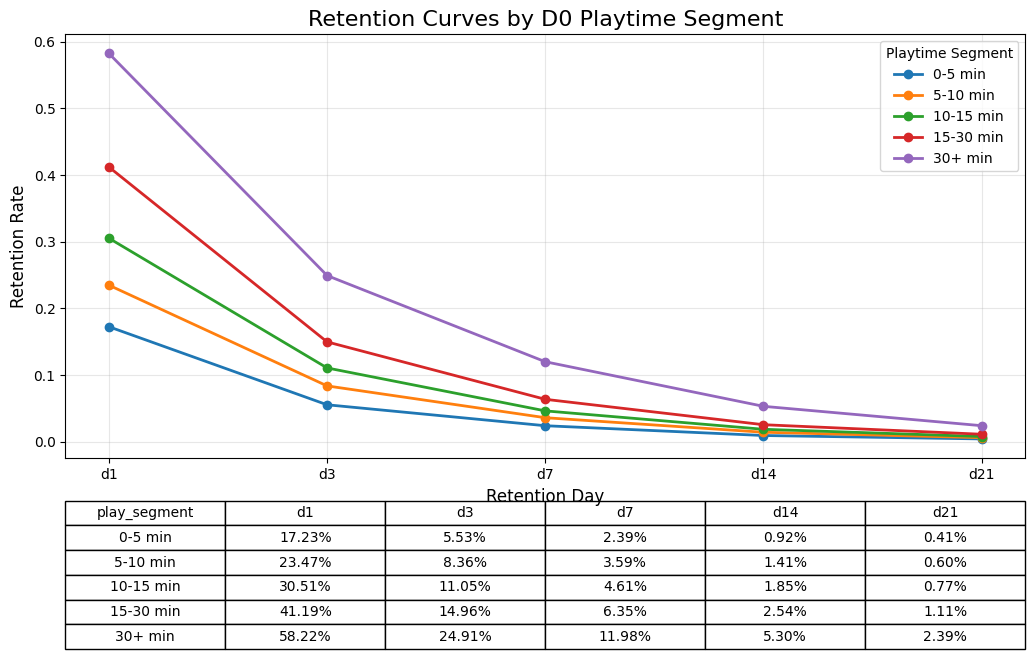

In [1]:
import sys
sys.path.append("../src")

from useranalysis.d0_playtime_segments_retention import plot_d0_playtime_retention

df_table = plot_d0_playtime_retention()


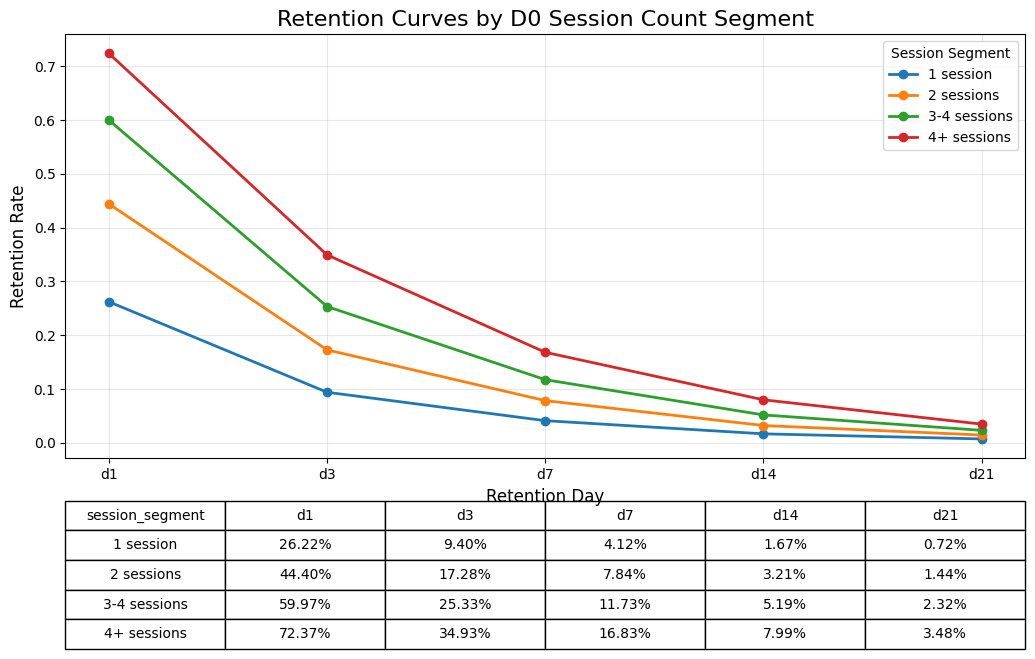

In [2]:
import sys
sys.path.append("../src")

from useranalysis.session_count_retention import plot_session_count_retention

df_session_ret = plot_session_count_retention()


The charts clearly show an improvement in retention as first-day engagement increases. Players who spend more time in their first session are substantially more likely to return in the following days.

## D0 Match Count × Win-Rate Segmentation

Understanding Player Skill & Engagement Profiles on Day 0

To explore early-game behavior patterns, I segmented players by:
How many matches they played on Day 0

Their win-rate brackets

- 0–25%
- 26–50%
- 51–75%
- 76–100%

The visualization below shows the user distribution across these combined segments (stacked by win-rate inside each match-count bucket).

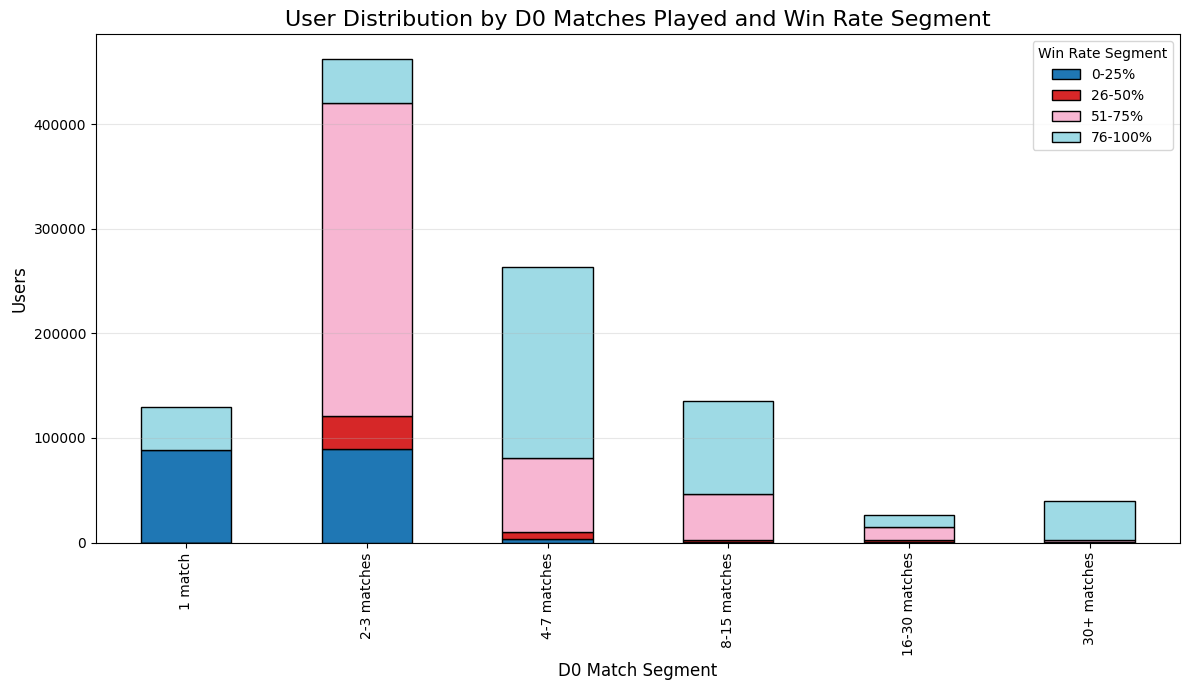

In [3]:
import sys
sys.path.append("../src")

from useranalysis.match_winrate_segments_distribution import plot_match_winrate_user_distribution

df_match_win = plot_match_winrate_user_distribution()


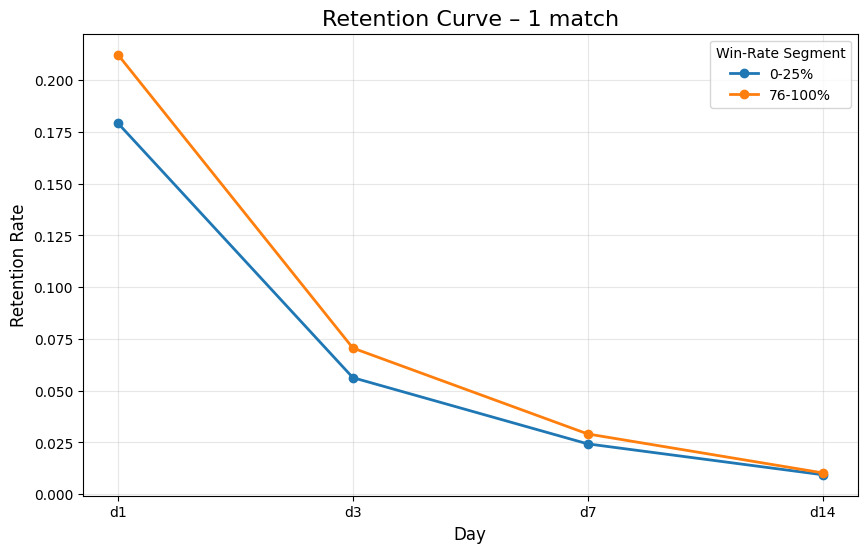

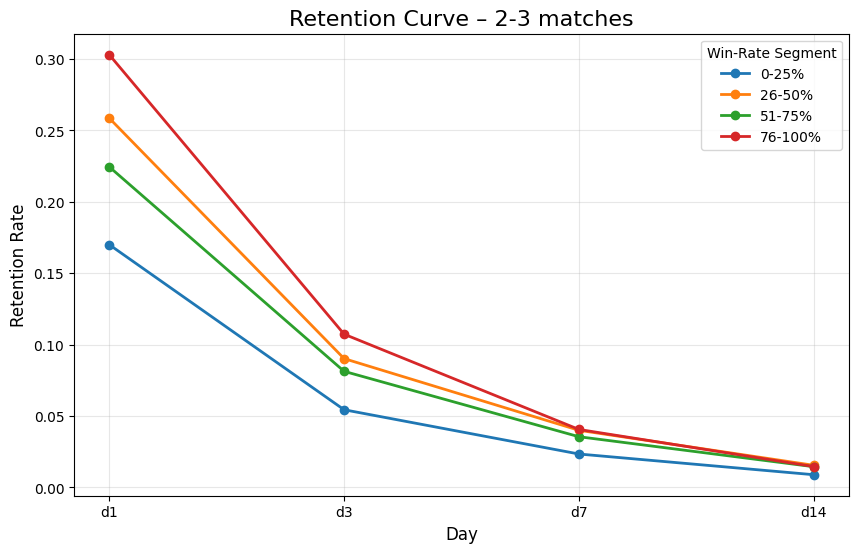

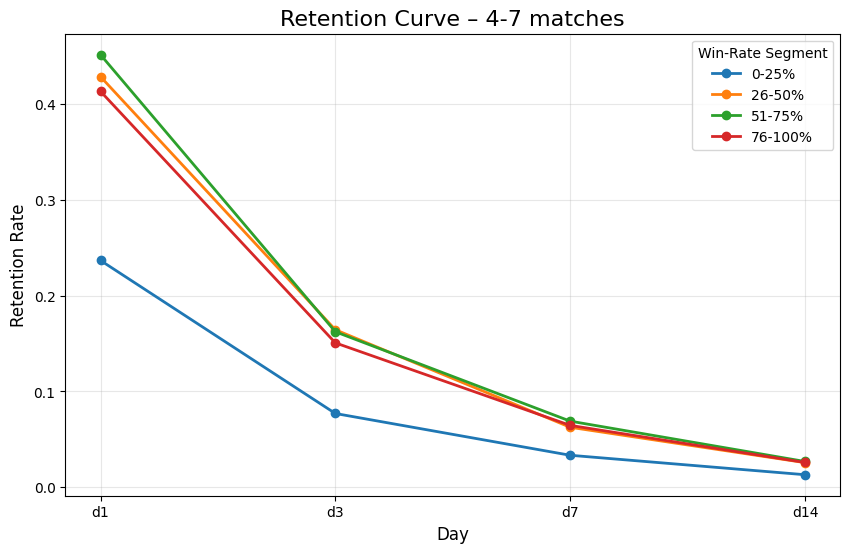

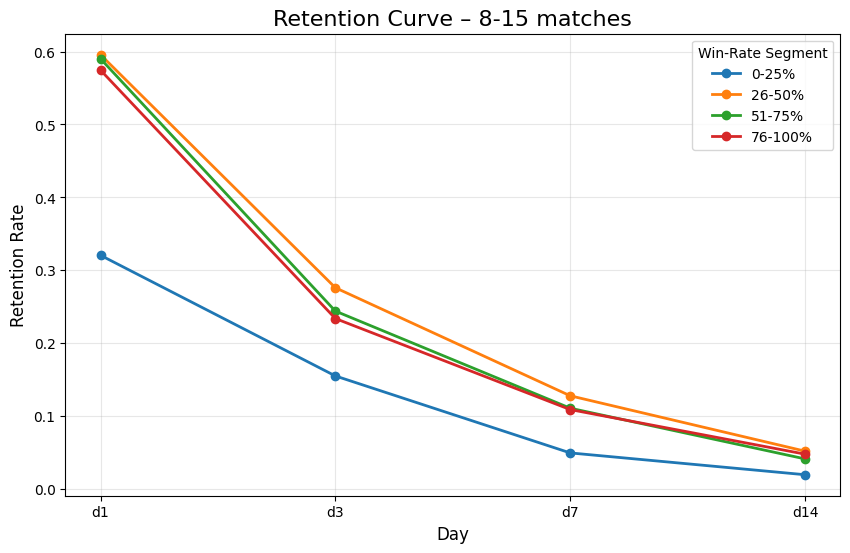

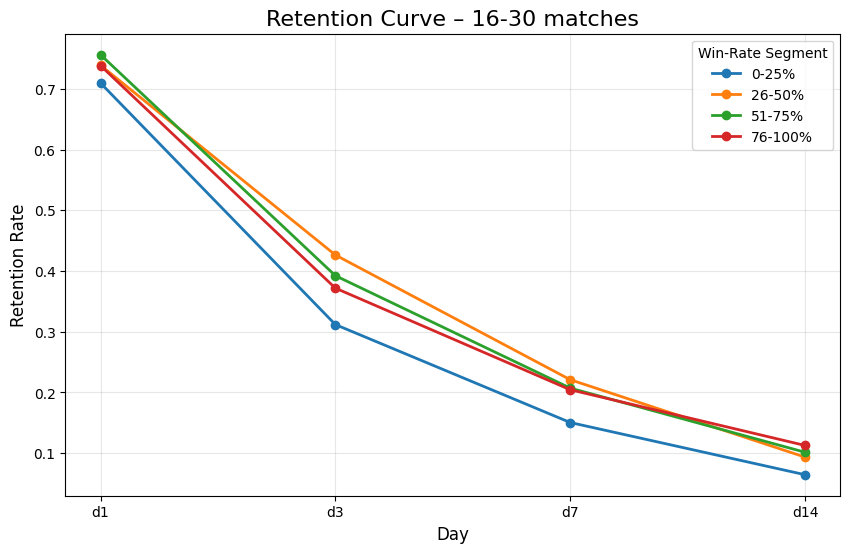

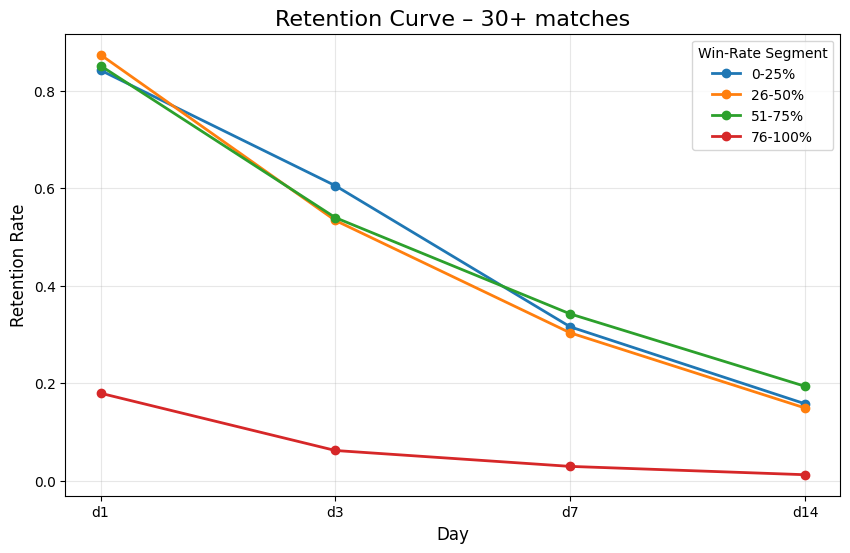

In [4]:
import sys
sys.path.append("../src")

from useranalysis.d0_match_winrate_retention import plot_match_winrate_retention

df_ret = plot_match_winrate_retention()


## Results
Engaged players who play many matches on Day 0 are dramatically more likely to return. 
    
This suggests "early engagement loops" are working well—more matches = more stickiness.

### Win-rate matters, but much less than match count

Win-rate segmentation has a clear but secondary impact:

Within each match segment, players with higher win-rates consistently retain better.

But the difference between match-count buckets is much larger than the difference between win-rate buckets.

### Low win-rate users churn fast unless they are highly engaged

For 0–25% win-rate players:

Retention is weak in low match brackets.

But if they play enough matches (8–15 / 16–30), retention becomes very strong.

#### This suggests:

Losing is not the main churn driver.

Lack of engagement (few matches) is the real churn driver.

Even low-skill players stick around if they find the gameplay engaging enough to continue.

#### Encourage players to reach at least 4–7 matches on Day 0.

<p style="color:#cc0000; font-weight:600;">Interpretation caveat: The lowest win-rate segments likely contain users who did not send match-result events—often due to crashes or mid-session abandonment. These technical/behavioral interruptions both reduce recorded win rate and strongly predict churn, which explains part of the retention gap.</p>

# Trend Analyses

To understand how player engagement evolves over time, I conducted trend analyses to show how players installed the game on the same data range.

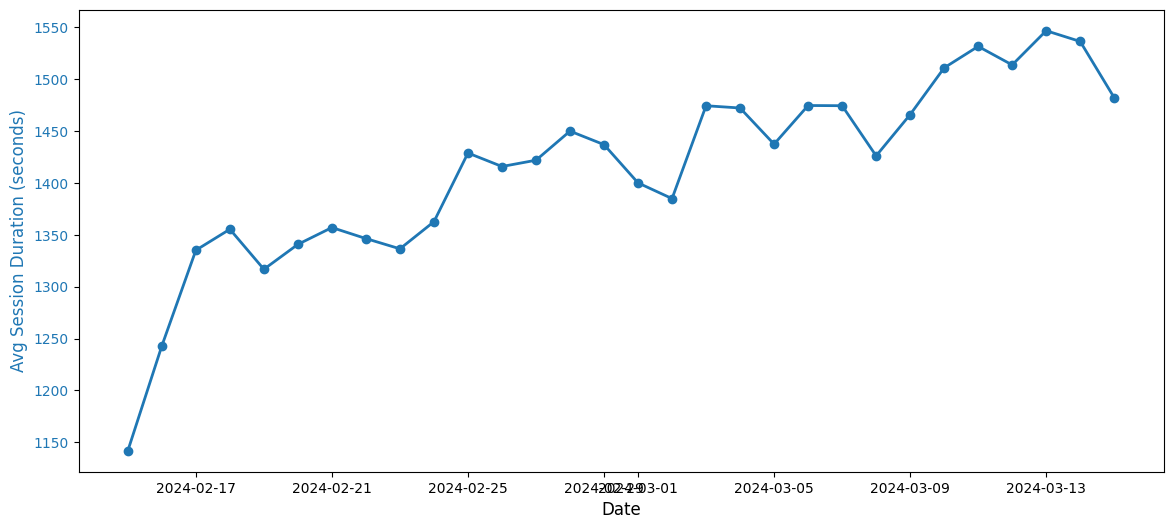

In [2]:
import sys
sys.path.append("../src")

from useranalysis.daily_session_duration_trend import plot_daily_session_duration_trend

df_daily = plot_daily_session_duration_trend()


### Daily Session Duration Trend

The average session duration shows a **clear upward trend** across the 30-day period:

- Rising from **~19 minutes to over 25 minutes**.
- A small dip around Mar 1–3, followed by a strong recovery.
- Peaks occur on weekends (Feb 24–25 and Mar 9–10), indicating **higher engagement on weekends**.

**Interpretation:**  
Session duration growth implies improving user engagement and possibly better game pacing, content loops.


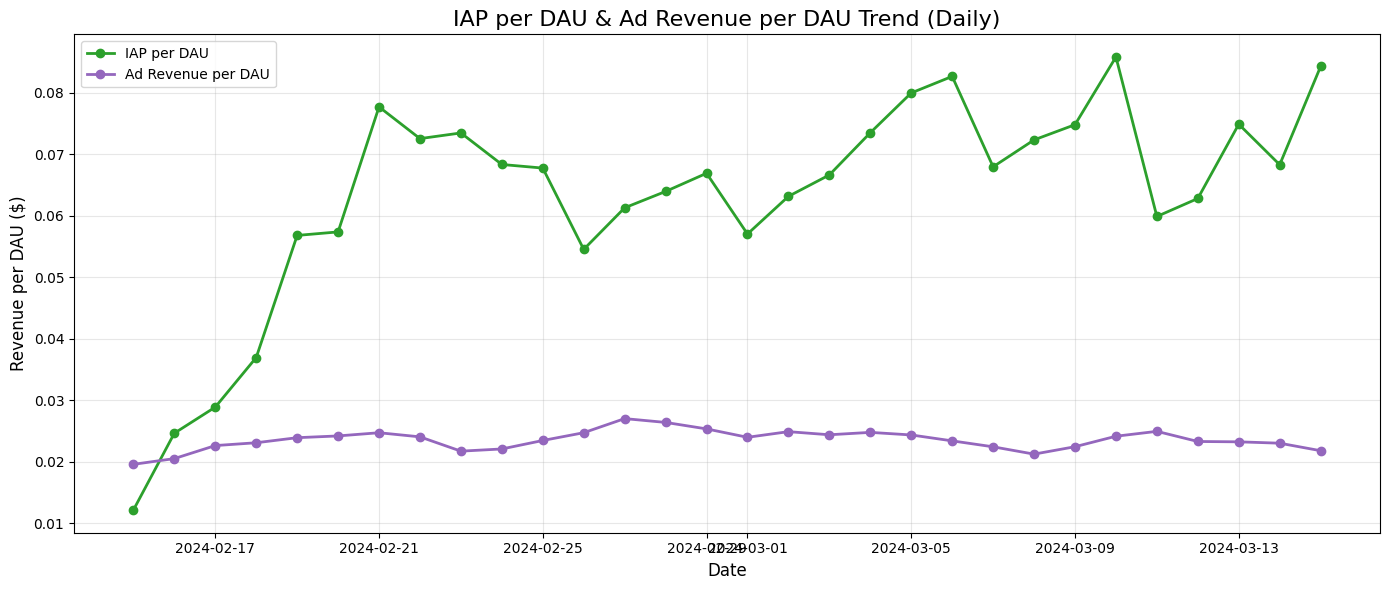

In [1]:
import sys
sys.path.append("../src")

from useranalysis.iap_ad_per_dau_trend import plot_iap_ad_per_dau_trend

df_iap_ad = plot_iap_ad_per_dau_trend()


### Insight: IAP vs Ad Revenue Trend

Over the observed period, IAP revenue per DAU shows a clear upward trend, while ad revenue per DAU remains stable. This suggests:

Players who continue engaging with the game are more likely to make in-app purchases, driving higher IAP averages.

No major spikes or drops appear in ad revenue, indicating no aggressive ad strategy changes (e.g., no sudden increase in rewarded placements).

The steady ad revenue combined with increasing IAP implies that core gameplay engagement, not ads, is driving monetization improvements.